In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import sqlite3
from datetime import datetime

In [2]:
con=sqlite3.connect('final_db.sqlite')
cursor = con.cursor()

In [3]:
df = pd.read_pickle('df.pkl')
players = pd.read_pickle('players.pkl')
df_teams = pd.read_pickle('df_teams.pkl')

In [4]:
df.columns

Index(['Equipe domicile', 'Equipe exterieure', 'Vainqueur', 'Score domicile',
       'Score extérieur', 'Buteurs', 'Lieu du match', 'Journée', 'Région',
       'Temperature moyenne', 'Précipitations en mm', 'Date'],
      dtype='object')

In [5]:
df_viz = pd.read_sql("""SELECT * FROM matchs""", con)

In [6]:
df_goals_players = pd.read_sql("""SELECT players.name, matchs.temperature, matchs.rainfall, matchs.date, matchs.place
                            FROM matchs
                            JOIN goals
                            ON goals.match_id = matchs.id
                            JOIN players
                            ON players.id = goals.player_id""",con)

In [7]:
## On doit avoir les dates, les buts par date, l'équipe correspondante et la météo
## 

In [8]:
# df_goals_per_match = pd.read_sql("""SELECT * FROM match_teams
#                                 """,con)

In [24]:
teams_goals_and_meteo = pd.read_sql("""SELECT teams.id, teams.name, match_teams.goal, match_teams.match_id, matchs.temperature, matchs.rainfall
                                    FROM teams
                                    JOIN match_teams 
                                    ON teams.id = team_id
                                    JOIN matchs 
                                    ON matchs.id = match_teams.match_id""",con)

In [119]:
player_goals_and_meteo = pd.read_sql("""
                                    SELECT players.id, players.name, goals.match_id, matchs.temperature, matchs.rainfall, COUNT(players.name) as goal
                                    FROM players
                                    JOIN goals
                                    ON players.id= goals.player_id
                                    JOIN matchs 
                                    ON matchs.id = goals.match_id
                                    GROUP BY match_id, players.name
                                    """,con)

In [ ]:
player_name = input("Tape le nom du joueur")

In [120]:
player =player_goals_and_meteo[player_goals_and_meteo['name'] == player_name]

In [121]:
player

,id,name,match_id,temperature,rainfall,goal
69,64,K. Mbappé,34,23.0,16.0,1
117,64,K. Mbappé,51,13.5,31.0,1
142,64,K. Mbappé,62,12.5,0.0,2
174,64,K. Mbappé,73,14.5,1.0,2
196,64,K. Mbappé,82,14.0,0.0,1
243,64,K. Mbappé,102,14.5,3.0,2
298,64,K. Mbappé,123,8.0,0.0,1
355,64,K. Mbappé,147,8.5,0.0,1
414,64,K. Mbappé,168,12.5,18.0,1
493,64,K. Mbappé,201,6.0,12.0,2


<AxesSubplot:xlabel='temperature', ylabel='goal'>

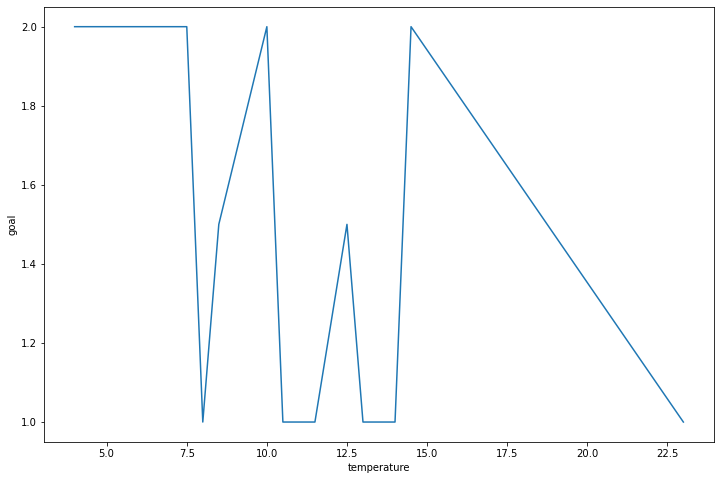

In [124]:
plt.figure(figsize=(12,8))
sns.lineplot(data=player, x="temperature", y="goal", err_style=None)

(0.0, 5.0)

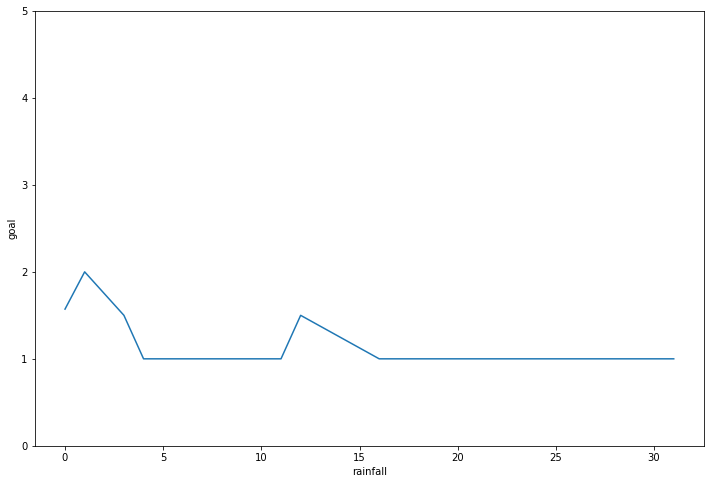

In [126]:
plt.figure(figsize=(12,8))
sns.lineplot(data=payer, x="rainfall", y="goal", err_style=None)
plt.ylim(0,5)

(0.0, 5.0)

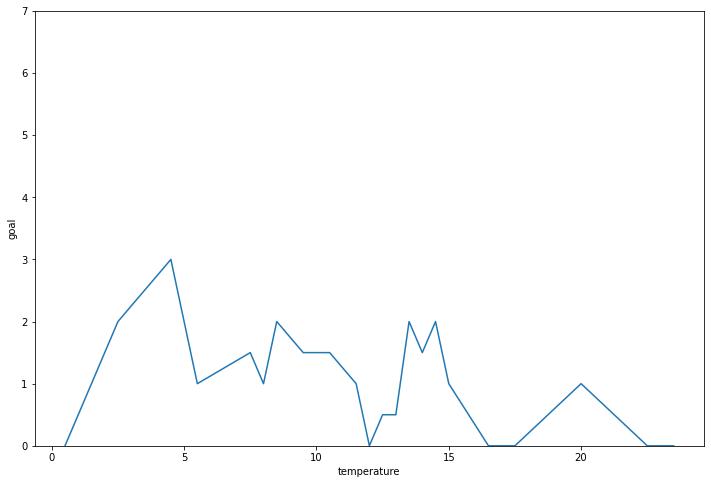

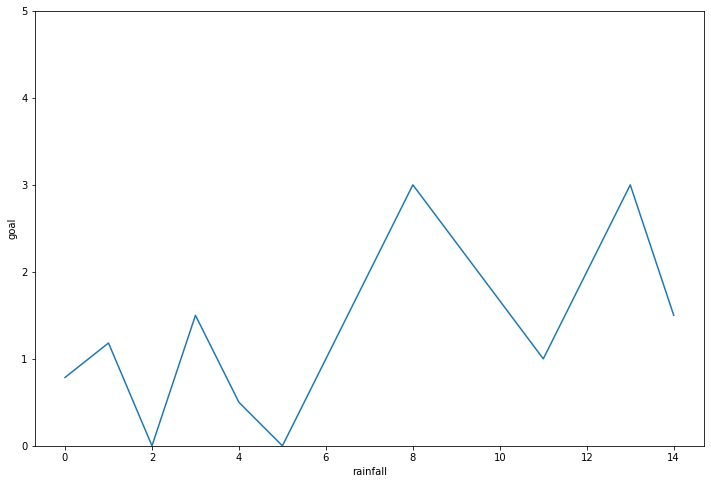

In [60]:
plt.figure(figsize=(12,8))
sns.lineplot(data=club_stats, x='temperature', y='goal', err_style=None)
plt.ylim(0,7)
plt.figure(figsize=(12,8))
sns.lineplot(data=club_stats, x='rainfall', y='goal', err_style=None)
plt.ylim(0,5)

In [133]:
import plotly.express as px
fig = px.scatter(teams_goals_and_meteo, x="temperature", y="rainfall", color="name", size='goal')
fig.show()

In [64]:
fig = px.pie(teams_goals_and_meteo, values="goal", names="name")
fig.show()

In [70]:
fig = px.histogram(teams_goals_and_meteo, x="temperature", y="goal", color="name", marginal="rug", hover_data=teams_goals_and_meteo.columns)
fig.show()

In [136]:
fig = px.histogram(teams_goals_and_meteo, x="temperature", y="goal", color="name",
                   marginal="box", # or violin, rug
                   hover_data=teams_goals_and_meteo.columns)
fig.show()